# Começando a puxar o dataset

Passa 1: Fazendo download da minha API do Kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juhgarcez","key":"63225d31cbe82b7ab21baa733592489e"}'}

Passo 2: Puxando o arquivo e armazenando do colab

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # proteger o arquivo

Passo 3: Instalando o kaggle

In [ ]:
!pip install -q kaggle

Passo 4: Fazendo download do dataset

In [ ]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews
License(s): CC0-1.0
amazon-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


Passo 5: Dizipando

In [5]:
!unzip -q amazon-reviews.zip -d ./data

replace ./data/amazon_review_polarity_csv.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Projeto - Final de conclusão

Pela descrição do Kaggle o que seria esses dados:

**RESUMO:**

Contém 34.686.770 avaliações da Amazon de 6.643.669 usuários em 2.441.053 produtos, do Stanford Network Analysis Project (SNAP). Este subconjunto contém 1.800.000 amostras de treinamento e 200.000 amostras de teste em cada sentimento de polaridade.

**ORIGEM:**

O conjunto de dados de avaliações da Amazon consiste em avaliações da Amazon. Os dados abrangem um período de 18 anos, incluindo ~ 35 milhões de avaliações até março de 2013. As avaliações incluem informações sobre produtos e usuários, classificações e uma revisão em texto simples. Para mais informações, consulte o seguinte artigo: J. McAuley e J. Leskovec. Fatores ocultos e tópicos ocultos: entendendo as dimensões da classificação com o texto de revisão. RecSys, 2013.

**DADOS:**

São duas bases de dados, uma de treino e outra de teste. Vamos usar nesse trabalho somente a base de treino, pois temos muitos dados e pouco recurso de ram para rodar esse projeto, porém se tiver um ram melhor acredito que possa ser usado conforme foi sugerido pelo dataset, ambas as bases.

In [4]:
import pandas as pd

base_train = pd.read_csv("/content/data/train.csv", header=None)  # base de train
#base_test = pd.read_csv("/content/data/test.csv", header = None)  # base de test
base_train.head()
#base_test.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


Começando a fazer um entendimento dos dados, entender que tipo sao os dados e se há valores nulos na base.

In [ ]:
#print(base_train.info())
#print(base_train.describe())
print(base_train.isnull().sum()) # verificando se há dados nulos

0      0
1    207
2      0
dtype: int64


In [5]:
#vou criar uma nova coluna para acrescentar dados faltantes da coluna 1 substituindo pelo da coluna 2
base_train["3"] = base_train[1].fillna(base_train[2])
base_train.head()

,0,1,2,3
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,Stuning even for the non-gamer
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,The best soundtrack ever to anything.
2,2,Amazing!,This soundtrack is my favorite music of all ti...,Amazing!
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,Excellent Soundtrack
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...","Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
print(base_train.isnull().sum()) # verificando se há dados nulos

0      0
1    207
2      0
3      0
dtype: int64


Baixar algumas bibliotecas que podemos utilizar na nossa analise.

In [18]:
!pip install transformers
!pip install datasets
!pip install torch
!pip install evaluate

In [16]:
!pip install --upgrade torchvision torchaudio --index-url https://download.pytorch.org/index.html
!pip install transformers datasets torch evaluate

Looking in indexes: https://download.pytorch.org/index.html
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch==2.6.0 (from torchvision) (from versions: none)
ERROR: No matching distribution found for torch==2.6.0


In [1]:
#!pip uninstall -y torch torchvision
!pip install torch torchvision --upgrade

In [2]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import load_dataset, DatasetDict
import evaluate
from torch.utils.data import DataLoader, SequentialSampler
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import wandb

wandb.init(mode="disabled")  # Desabilita o Wandb

Reduz o dataset para conseguir rodar mais rápido no google colab, e para que eu consiga ter uma amostra significativa para rodar o modelo irei separar meu modelo em 3 amostras de 1% cada.

In [ ]:
##########          NÃO USAR POR ENQUANTO!!!            ################

# Olhando o tamanho original
#print(f"Tamanho original: {len(base_train)}")

# Pegando uma amostra aleatória de 1% dos dados (ou um número fixo)
#df_sampled = base_train.sample(frac=0.01, random_state=42)  # 1% dos dados, com valores aleatórios

# Ou pegar 10 mil linhas fixas
#df_sampled =base_train.sample(n=10000, random_state=42)

#print(f"Tamanho após amostragem: {len(df_sampled)}")

# Visualizando
#df_sampled.head()


Tamanho original: 3600000
Tamanho após amostragem: 36000


,0,1,2,3
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...,Expensive Junk
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d...",Toast too dark
3463669,2,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...,Excellent imagery...dumbed down story
2914699,1,Are we pretending everyone is married?,The authors pretend that parents neither die n...,Are we pretending everyone is married?
1603231,1,Not worth your time,"Might as well just use a knife, this product h...",Not worth your time


In [6]:

# Olhando o tamanho original
print(f"Tamanho original: {len(base_train)}")

# Ou pegar 10 mil linhas fixas
#df_sampled =base_train.sample(n=10000, random_state=42)

# Embaralha meus dados aletóriamente.
base_train = base_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Calcular 1% da base
n = int(len(base_train) * 0.01)

# Dividir em três bases de 1% cada
base1 = base_train.iloc[:n]
base2 = base_train.iloc[n:2*n]
base3 = base_train.iloc[2*n:3*n]



print(f"Tamanho após amostragem: {len(base1)}")
print(f"Tamanho após amostragem: {len(base2)}")
print(f"Tamanho após amostragem: {len(base3)}")

# Visualizando
base1.head()
base2.head()
base3.head()

Tamanho original: 3600000
Tamanho após amostragem: 36000
Tamanho após amostragem: 36000
Tamanho após amostragem: 36000


,0,1,2,3
72000,2,Clarify Your Worldview,This book will help any Christian clarify the ...,Clarify Your Worldview
72001,1,"If Amazon.com deletes Kevin Bold's reviews, th...",Nemo Domi (_nemo_: no one; _domi_: from _domus...,"If Amazon.com deletes Kevin Bold's reviews, th..."
72002,1,Really bad,"I had high hopes for this product, I got it fo...",Really bad
72003,2,Pretty and affordable,These were on sale at Macy's and I got an addi...,Pretty and affordable
72004,2,Practical Prayers for Children,I came across this book during a recent trip t...,Practical Prayers for Children


# 1° Modelo :

TEXTBLOB uma biblioteca simples de processamento de liguagem neural (NLP).

Utilizei inicialmente essa biblioteca mais leve, para que eu consiga ter uma primeira analise de sentimento.

In [ ]:
###########           NÃO UTILIZAR         ################

#from textblob import TextBlob

# Função pra pegar sentimento
#def get_sentiment(text):
 #   blob = TextBlob(str(text))
  #  polarity = blob.sentiment.polarity
  #  if polarity > 0:
  #      return 'positive'
  #  elif polarity < 0:
  #      return 'negative'
  #  else:
  #      return 'neutral'

# Aplicando no dataset
#df_sampled['sentiment'] = df_sampled[2].apply(get_sentiment)

# Visualizar
#df_sampled[[0,2, 'sentiment']].head()


NameError: name 'df_sampled' is not defined

In [ ]:
from textblob import TextBlob

# Função pra pegar sentimento
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Aplicando no dataset
base1['sentiment'] = base1[2].apply(get_sentiment)
base2['sentiment'] = base2[2].apply(get_sentiment)
base3['sentiment'] = base3[2].apply(get_sentiment)

# Visualizar
base1[[0,2, 'sentiment']].head()
base2[[0,2, 'sentiment']].head()
base3[[0,2, 'sentiment']].head()

<ipython-input-15-fc788a405813>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['sentiment'] = base1[2].apply(get_sentiment)
<ipython-input-15-fc788a405813>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base2['sentiment'] = base2[2].apply(get_sentiment)
<ipython-input-15-fc788a405813>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,0,2,sentiment
72000,2,This was a very touching book about the Armeni...,positive
72001,2,"Overall, I love it.Pros: - good pictures quali...",positive
72002,2,"This movie is about a teenager's dream, and se...",positive
72003,1,Horrible and depressing waste of time and hear...,negative
72004,2,These are the typical Birkenstock fit ... imme...,negative


A base de treino tem na coluna 0 uma analise de sentimento, onde 1 - negativo e 2 - positivo, vamos tentar comparar o que o modelo gerou com o que tem de classificação na base de dados.

E possível verificar que para as três amostras de treino, eu obtive uma acurácia de aproximadamente 0.65, ou seja, para um modelo simples, teve um resultado satisfatorio.

In [ ]:
from tkinter.constants import Y
mapeamento_real = {1: 'negative', 2: 'positive'}
base1['sentimento_real_str'] = base1[0].map(mapeamento_real)
base2['sentimento_real_str'] = base2[0].map(mapeamento_real)
base3['sentimento_real_str'] = base3[0].map(mapeamento_real)

# 2. Opcional: remover neutros se quiser avaliar apenas positivos/negativos
df_filtrado_base1 = base1[base1['sentiment'] != 'neutro']
df_filtrado_base2 = base2[base2['sentiment'] != 'neutro']
df_filtrado_base3 = base3[base3['sentiment'] != 'neutro']

# 3. Comparar
y_true_1 = df_filtrado_base1['sentimento_real_str']
y_pred_1 = df_filtrado_base1['sentiment']
y_true_2 = df_filtrado_base2['sentimento_real_str']
y_pred_2 = df_filtrado_base2['sentiment']
Y_true_3 = df_filtrado_base3['sentimento_real_str']
y_pred_3 = df_filtrado_base3['sentiment']

# 4. Calcular métricas
print("Acurácia base1:", accuracy_score(y_true_1, y_pred_1))
print("Acurácia base2:", accuracy_score(y_true_2, y_pred_2))
print("Acurácia base3:", accuracy_score(Y_true_3, y_pred_3))
print("\nMatriz de Confusão base1:\n", confusion_matrix(y_true_1, y_pred_1))
print("\nMatriz de Confusão base2:\n", confusion_matrix(y_true_2, y_pred_2))
print("\nMatriz de Confusão base3:\n", confusion_matrix(Y_true_3, y_pred_3))
print("\nRelatório de Classificação base 1:\n", classification_report(y_true_1, y_pred_1))
print("\nRelatório de Classificação base 2:\n", classification_report(y_true_2, y_pred_2))
print("\nRelatório de Classificação base 3:\n", classification_report(Y_true_3, y_pred_3))

<ipython-input-16-b53ffe0ca48b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['sentimento_real_str'] = base1[0].map(mapeamento_real)
<ipython-input-16-b53ffe0ca48b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base2['sentimento_real_str'] = base2[0].map(mapeamento_real)
<ipython-input-16-b53ffe0ca48b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Acurácia base1: 0.6485
Acurácia base2: 0.6528333333333334
Acurácia base3: 0.6506111111111111

Matriz de Confusão base1:
 [[ 6594   569 10826]
 [    0     0     0]
 [  978   281 16752]]

Matriz de Confusão base2:
 [[ 6664   575 10641]
 [    0     0     0]
 [  998   284 16838]]

Matriz de Confusão base3:
 [[ 6775   592 10657]
 [    0     0     0]
 [ 1064   265 16647]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


Relatório de Classificação base 1:
               precision    recall  f1-score   support

    negative       0.87      0.37      0.52     17989
     neutral       0.00      0.00      0.00         0
    positive       0.61      0.93      0.73     18011

    accuracy                           0.65     36000
   macro avg       0.49      0.43      0.42     36000
weighted avg       0.74      0.65      0.63     36000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Relatório de Classificação base 2:
               precision    recall  f1-score   support

    negative       0.87      0.37      0.52     17880
     neutral       0.00      0.00      0.00         0
    positive       0.61      0.93      0.74     18120

    accuracy                           0.65     36000
   macro avg       0.49      0.43      0.42     36000
weighted avg       0.74      0.65      0.63     36000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Relatório de Classificação base 3:
               precision    recall  f1-score   support

    negative       0.86      0.38      0.52     18024
     neutral       0.00      0.00      0.00         0
    positive       0.61      0.93      0.74     17976

    accuracy                           0.65     36000
   macro avg       0.49      0.43      0.42     36000
weighted avg       0.74      0.65      0.63     36000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2° Modelo:

Utilizei um distilBERT (modelo menor de BERT), ou seja, um modelo já treinado para analise de sentimento. Muito usado em texto em inglês e que trás um resultado mais preciso.

Modelo usado : distilbert-base-uncased-finetuned-sst-2-english

Para conseguir rodar o modelo com a quantidade de dados que eu tenho no meu dataset, precisei rodar o modelo em pequenos lotes de 100 amostras inicialmente e depois eu tentei rodar o modelo com uma amostro maior após fazer o estudo de tokens.

In [ ]:
################ NÃO UTILIZAR ###########################

#from transformers import pipeline
#from tqdm import tqdm  # Barra de progresso

# Carregar seu dataset reduzido
#df_sampled = df.sample(frac=0.01, random_state=42)  # ou n=10000
#df_sampled = df_sampled.reset_index(drop=True)

# Carregar o pipeline de sentimento
#sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Processar em lotes
#batch_size = 100  # usei 100 porque é mais seguro

#sentiments = []
#for i in tqdm(range(0, len(df_sampled), batch_size)):
 #   batch = df_sampled[2].iloc[i:i+batch_size].tolist()
 #   results = sentiment_pipeline(batch)
 #   sentiments.extend(results)

# Adicionar resultados ao dataframe
#df_sampled['label'] = [r['label'] for r in sentiments]
#df_sampled['score'] = [r['score'] for r in sentiments]

# Visualizar
#df_sampled[[0,2, 'label', 'score']].head()


KeyboardInterrupt: 

Aplicando o estudo de tokens para determinar o quanto de max_length será necessário para rodar meu modelo, ou seja, descobrindo isso eu consigo economizar memória e rodar somente com os max_lenth padronizado

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


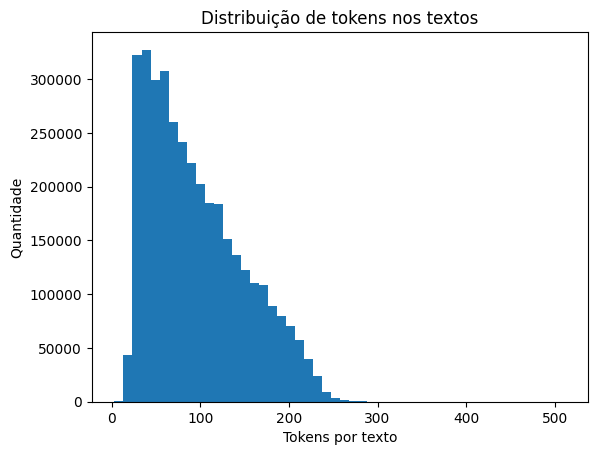

In [7]:


tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Pegue uma amostra para não travar a RAM
amostra_textos = base_train

comprimento_tokens = [len(tokenizer.encode(text, truncation=True, max_length=512)) for text in amostra_textos[2]]

plt.hist(comprimento_tokens, bins=50)
plt.xlabel('Tokens por texto')
plt.ylabel('Quantidade')
plt.title('Distribuição de tokens nos textos')
plt.show()

Modelo aplicado na base_1.

Aqui eu aplico o modelo BERT na base_1 sem tokenizar o modelo.

In [ ]:
from transformers import pipeline
from tqdm import tqdm  # Barra de progresso

# Carregar seu dataset reduzido
#df_sampled_1 = base1(frac=0.01, random_state=42)  # ou n=10000
#df_sampled = df_sampled.reset_index(drop=True)
df_sampled_1 = base1

# Carregar o pipeline de sentimento
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Processar em lotes
batch_size = 1000  # usei 100 porque é mais seguro

sentiments = []
for i in tqdm(range(0, len(df_sampled_1), batch_size)):
    batch = df_sampled_1[2].iloc[i:i+batch_size].tolist()
    results = sentiment_pipeline(batch)
    sentiments.extend(results)

# Adicionar resultados ao dataframe
df_sampled_1['label'] = [r['label'] for r in sentiments]
df_sampled_1['score'] = [r['score'] for r in sentiments]

# Visualizar
df_sampled_1[[0,2, 'label', 'score']].head()

Device set to use cpu
100%|██████████| 36/36 [2:08:34<00:00, 214.28s/it]
<ipython-input-18-d72e1f9cc4dd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_1['label'] = [r['label'] for r in sentiments]
<ipython-input-18-d72e1f9cc4dd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_1['score'] = [r['score'] for r in sentiments]


,0,2,label,score
0,2,A day by day account of a pilot's attempts to ...,NEGATIVE,0.993994
1,2,I enjoyed this movie. It shows how the San Fra...,POSITIVE,0.999876
2,2,Out of all the Pizzicato Five (and Shibuya-kei...,POSITIVE,0.999868
3,2,"This is a short, fun read, nothing deep and no...",POSITIVE,0.999732
4,1,This book basically tells you alot of boring s...,NEGATIVE,0.999580


Meço a acurácia do modelo, e obtenho um resultado satisfatório de aproximadamente 0,89 de acurácia.

In [ ]:
from tkinter.constants import Y
mapeamento_real = {1: 'NEGATIVE', 2: 'POSITIVE'}
df_sampled_1['sentimento_real_str'] = df_sampled_1[0].map(mapeamento_real)

# 2. Opcional: remover neutros se quiser avaliar apenas positivos/negativos
#df_filtrado_base1_Model2 = base1[base1['sentiment'] != 'neutro']


# 3. Comparar
y_true_1_model2 = df_sampled_1['sentimento_real_str']
y_pred_1_model2 = df_sampled_1['label']


# 4. Calcular métricas
print("Acurácia base1:", accuracy_score(y_true_1_model2, y_pred_1_model2))
print("\nMatriz de Confusão base1:\n", confusion_matrix(y_true_1_model2, y_pred_1_model2))
print("\nRelatório de Classificação base 1:\n", classification_report(y_true_1_model2, y_pred_1_model2))


<ipython-input-21-0ada2326d7dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_1['sentimento_real_str'] = df_sampled_1[0].map(mapeamento_real)


Acurácia base1: 0.8819722222222223

Matriz de Confusão base1:
 [[16362  1627]
 [ 2622 15389]]

Relatório de Classificação base 1:
               precision    recall  f1-score   support

    NEGATIVE       0.86      0.91      0.89     17989
    POSITIVE       0.90      0.85      0.88     18011

    accuracy                           0.88     36000
   macro avg       0.88      0.88      0.88     36000
weighted avg       0.88      0.88      0.88     36000



Aplicando o estudo de tokens na base_2 e base_3 é possível analisar que menos de  50 tokens cobrem grande parte dos meus dados.

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


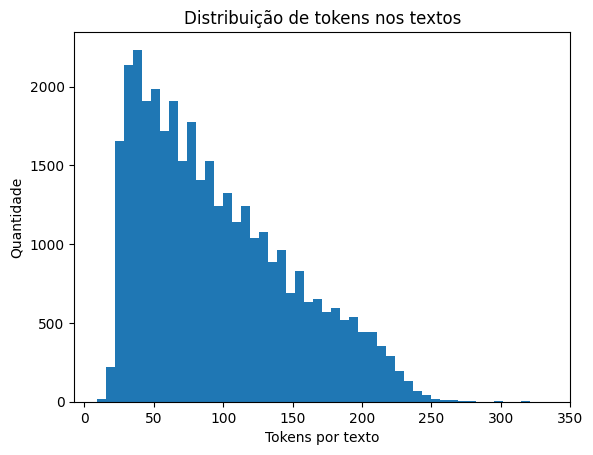

In [ ]:
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Pegue uma amostra para não travar a RAM
amostra_textos = base2

comprimento_tokens = [len(tokenizer.encode(text, truncation=True, max_length=512)) for text in amostra_textos[2]]

plt.hist(comprimento_tokens, bins=50)
plt.xlabel('Tokens por texto')
plt.ylabel('Quantidade')
plt.title('Distribuição de tokens nos textos')
plt.show()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


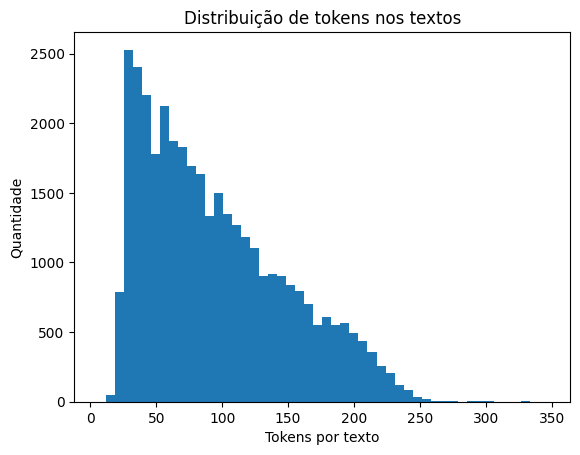

In [ ]:
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Pegue uma amostra para não travar a RAM
amostra_textos = base3

comprimento_tokens = [len(tokenizer.encode(text, truncation=True, max_length=512)) for text in amostra_textos[2]]

plt.hist(comprimento_tokens, bins=50)
plt.xlabel('Tokens por texto')
plt.ylabel('Quantidade')
plt.title('Distribuição de tokens nos textos')
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TextClassificationPipeline

# Carregar seu dataset reduzido
df_sampled_2 = base2
#df_sampled = df_sampled.reset_index(drop=True)

# Carregar o pipeline de sentimento
#sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Carrega modelo e tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Cria pipeline com truncamento e max_length customizado
sentiment_pipeline = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=False,
    truncation=True,
    max_length=50,  # Limita para economizar memória
    padding=True,
    device=0 if torch.cuda.is_available() else -1  # Usa GPU se disponível
)

# Processar em lotes
batch_size = 1000  # usei 100 porque é mais seguro

sentiments = []
for i in tqdm(range(0, len(df_sampled_2), batch_size)):
    batch = df_sampled_2[2].iloc[i:i+batch_size].tolist()
    results = sentiment_pipeline(batch)
    sentiments.extend(results)

# Adicionar resultados ao dataframe
df_sampled_2['label'] = [r['label'] for r in sentiments]
df_sampled_2['score'] = [r['score'] for r in sentiments]

# Visualizar
df_sampled_2[[0,2, 'label', 'score']].head()

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
100%|██████████| 36/36 [1:11:57<00:00, 119.94s/it]
<ipython-input-25-bc5e87ed7324>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_2['label'] = [r['label'] for r in sentiments]
<ipython-input-25-bc5e87ed7324>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,0,2,label,score
36000,1,"This Product Is A Nice Product To Have , But T...",NEGATIVE,0.989042
36001,1,i read the whole thing hoping it would get bet...,NEGATIVE,0.993362
36002,2,This is a great product! We bought this when m...,POSITIVE,0.999792
36003,1,"Overall, this seemed like a great little camer...",POSITIVE,0.646860
36004,2,"Its better than it looks, not that it couldn't...",POSITIVE,0.997263


In [ ]:
from tkinter.constants import Y
mapeamento_real = {1: 'NEGATIVE', 2: 'POSITIVE'}
df_sampled_2['sentimento_real_str'] = df_sampled_2[0].map(mapeamento_real)

# 2. Opcional: remover neutros se quiser avaliar apenas positivos/negativos
#df_filtrado_base1_Model2 = base1[base1['sentiment'] != 'neutro']


# 3. Comparar
y_true_2_model2 = df_sampled_2['sentimento_real_str']
y_pred_2_model2 = df_sampled_2['label']


# 4. Calcular métricas
print("Acurácia base2:", accuracy_score(y_true_2_model2, y_pred_2_model2))
print("\nMatriz de Confusão base2:\n", confusion_matrix(y_true_2_model2, y_pred_2_model2))
print("\nRelatório de Classificação base 2:\n", classification_report(y_true_2_model2, y_pred_2_model2))


<ipython-input-26-1354721189a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_2['sentimento_real_str'] = df_sampled_2[0].map(mapeamento_real)


Acurácia base2: 0.8263333333333334

Matriz de Confusão base2:
 [[15134  2746]
 [ 3506 14614]]

Relatório de Classificação base 2:
               precision    recall  f1-score   support

    NEGATIVE       0.81      0.85      0.83     17880
    POSITIVE       0.84      0.81      0.82     18120

    accuracy                           0.83     36000
   macro avg       0.83      0.83      0.83     36000
weighted avg       0.83      0.83      0.83     36000



In [ ]:

# Carregar seu dataset reduzido
df_sampled_3 = base3
#df_sampled = df_sampled.reset_index(drop=True)

# Carregar o pipeline de sentimento
#sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Processar em lotes
batch_size = 10000  # vou tentar usar um batch maior.

sentiments = []
for i in tqdm(range(0, len(df_sampled_3), batch_size)):
    batch = df_sampled_3[2].iloc[i:i+batch_size].tolist()
    results = sentiment_pipeline(batch)
    sentiments.extend(results)

# Adicionar resultados ao dataframe
df_sampled_3['label'] = [r['label'] for r in sentiments]
df_sampled_3['score'] = [r['score'] for r in sentiments]

# Visualizar
df_sampled_3[[0,2, 'label', 'score']].head()

100%|██████████| 4/4 [1:11:52<00:00, 1078.05s/it]
<ipython-input-27-db3ad1f92780>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_3['label'] = [r['label'] for r in sentiments]
<ipython-input-27-db3ad1f92780>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_3['score'] = [r['score'] for r in sentiments]


,0,2,label,score
72000,2,This was a very touching book about the Armeni...,POSITIVE,0.999089
72001,2,"Overall, I love it.Pros: - good pictures quali...",POSITIVE,0.999715
72002,2,"This movie is about a teenager's dream, and se...",NEGATIVE,0.998209
72003,1,Horrible and depressing waste of time and hear...,NEGATIVE,0.999810
72004,2,These are the typical Birkenstock fit ... imme...,NEGATIVE,0.738157


In [ ]:
from tkinter.constants import Y
mapeamento_real = {1: 'NEGATIVE', 2: 'POSITIVE'}
df_sampled_3['sentimento_real_str'] = df_sampled_3[0].map(mapeamento_real)

# 2. Opcional: remover neutros se quiser avaliar apenas positivos/negativos
#df_filtrado_base1_Model2 = base1[base1['sentiment'] != 'neutro']


# 3. Comparar
y_true_3_model2 = df_sampled_3['sentimento_real_str']
y_pred_3_model2 = df_sampled_3['label']


# 4. Calcular métricas
print("Acurácia base2:", accuracy_score(y_true_3_model2, y_pred_3_model2))
print("\nMatriz de Confusão base2:\n", confusion_matrix(y_true_3_model2, y_pred_3_model2))
print("\nRelatório de Classificação base 2:\n", classification_report(y_true_3_model2, y_pred_3_model2))


<ipython-input-28-abd47fc0dbc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_3['sentimento_real_str'] = df_sampled_3[0].map(mapeamento_real)


Acurácia base2: 0.8229166666666666

Matriz de Confusão base2:
 [[15207  2817]
 [ 3558 14418]]

Relatório de Classificação base 2:
               precision    recall  f1-score   support

    NEGATIVE       0.81      0.84      0.83     18024
    POSITIVE       0.84      0.80      0.82     17976

    accuracy                           0.82     36000
   macro avg       0.82      0.82      0.82     36000
weighted avg       0.82      0.82      0.82     36000



Medir desempenho:

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TextClassificationPipeline
from tqdm import tqdm
import pandas as pd
import time
import psutil
import torch

# Carregar seu dataset reduzido
df_sampled_3 = base3
#df_sampled = df_sampled.reset_index(drop=True)

# Carregar o pipeline de sentimento
#sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Carrega modelo e tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Cria pipeline com truncamento e max_length customizado
sentiment_pipeline = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=False,
    truncation=True,
    max_length=50,  # Limita para economizar memória
    padding=True,
    device=0 if torch.cuda.is_available() else -1  # Usa GPU se disponível
)

# Processar em lotes
batch_size = 1000  # usei 100 porque é mais seguro
sentiments = []

# Monitoramento
print("Iniciando análise de inferência...\n")
start_time = time.time()
mem_before = psutil.virtual_memory().used


if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    gpu_mem_before = torch.cuda.memory_allocated()


for i in tqdm(range(0, len(df_sampled_3), batch_size)):
    batch = df_sampled_3[2].iloc[i:i+batch_size].tolist()
    batch_start = time.time()
    results = sentiment_pipeline(batch)
    batch_end = time.time()
    print(f"Lote {i // batch_size + 1} processado em {batch_end - batch_start:.2f} segundos")
    sentiments.extend(results)

# Medições finais
end_time = time.time()
mem_after = psutil.virtual_memory().used
tempo_total = end_time - start_time
memoria_usada = (mem_after - mem_before) / (1024 ** 2)

# GPU
if torch.cuda.is_available():
    gpu_mem_after = torch.cuda.memory_allocated()
    gpu_peak = torch.cuda.max_memory_allocated()
    print(f"Uso de memória GPU: {(gpu_mem_after - gpu_mem_before) / (1024 ** 2):.2f} MB")
    print(f"Pico de memória GPU: {gpu_peak / (1024 ** 2):.2f} MB")

# Resultados
print("\nResumo da Inferência:")
print(f"- Tempo total de inferência: {tempo_total:.2f} segundos")
print(f"- Tempo médio por amostra: {tempo_total / len(df_sampled_3):.4f} segundos")
print(f"- Memória RAM consumida: {memoria_usada:.2f} MB")

# Adicionar resultados ao dataframe
df_sampled_3['label'] = [r['label'] for r in sentiments]
df_sampled_3['score'] = [r['score'] for r in sentiments]

# Visualizar
df_sampled_3[[0,2, 'label', 'score']].head()

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Iniciando análise de inferência...



  3%|▎         | 1/36 [01:50<1:04:38, 110.82s/it]

Lote 1 processado em 110.82 segundos


  6%|▌         | 2/36 [03:43<1:03:16, 111.66s/it]

Lote 2 processado em 112.24 segundos


  8%|▊         | 3/36 [05:32<1:00:49, 110.60s/it]

Lote 3 processado em 109.35 segundos


 11%|█         | 4/36 [07:22<58:48, 110.25s/it]  

Lote 4 processado em 109.71 segundos


 14%|█▍        | 5/36 [09:10<56:40, 109.69s/it]

Lote 5 processado em 108.69 segundos


 17%|█▋        | 6/36 [10:57<54:22, 108.74s/it]

Lote 6 processado em 106.89 segundos


 19%|█▉        | 7/36 [12:46<52:30, 108.64s/it]

Lote 7 processado em 108.44 segundos


 22%|██▏       | 8/36 [14:35<50:47, 108.83s/it]

Lote 8 processado em 109.23 segundos


 25%|██▌       | 9/36 [16:23<48:50, 108.54s/it]

Lote 9 processado em 107.90 segundos


 28%|██▊       | 10/36 [18:13<47:13, 108.99s/it]

Lote 10 processado em 109.99 segundos


 31%|███       | 11/36 [20:02<45:25, 109.03s/it]

Lote 11 processado em 109.13 segundos


 33%|███▎      | 12/36 [21:49<43:25, 108.55s/it]

Lote 12 processado em 107.43 segundos


 36%|███▌      | 13/36 [23:40<41:53, 109.27s/it]

Lote 13 processado em 110.92 segundos


 39%|███▉      | 14/36 [25:31<40:12, 109.64s/it]

Lote 14 processado em 110.51 segundos


 42%|████▏     | 15/36 [27:20<38:22, 109.63s/it]

Lote 15 processado em 109.59 segundos


 44%|████▍     | 16/36 [29:08<36:22, 109.13s/it]

Lote 16 processado em 107.96 segundos


 47%|████▋     | 17/36 [30:58<34:38, 109.40s/it]

Lote 17 processado em 110.02 segundos


 50%|█████     | 18/36 [32:49<32:53, 109.65s/it]

Lote 18 processado em 110.23 segundos


 53%|█████▎    | 19/36 [34:37<30:55, 109.15s/it]

Lote 19 processado em 107.97 segundos


 56%|█████▌    | 20/36 [36:25<29:04, 109.03s/it]

Lote 20 processado em 108.75 segundos


 58%|█████▊    | 21/36 [38:13<27:09, 108.65s/it]

Lote 21 processado em 107.77 segundos


 61%|██████    | 22/36 [40:02<25:21, 108.66s/it]

Lote 22 processado em 108.67 segundos


 64%|██████▍   | 23/36 [41:52<23:38, 109.10s/it]

Lote 23 processado em 110.13 segundos


 67%|██████▋   | 24/36 [43:40<21:46, 108.87s/it]

Lote 24 processado em 108.33 segundos


 69%|██████▉   | 25/36 [45:29<19:57, 108.88s/it]

Lote 25 processado em 108.92 segundos


 72%|███████▏  | 26/36 [47:18<18:09, 108.97s/it]

Lote 26 processado em 109.18 segundos


 75%|███████▌  | 27/36 [49:06<16:17, 108.60s/it]

Lote 27 processado em 107.73 segundos


 78%|███████▊  | 28/36 [50:54<14:28, 108.54s/it]

Lote 28 processado em 108.38 segundos


 81%|████████  | 29/36 [52:45<12:42, 109.00s/it]

Lote 29 processado em 110.07 segundos


 83%|████████▎ | 30/36 [54:34<10:55, 109.22s/it]

Lote 30 processado em 109.73 segundos


 86%|████████▌ | 31/36 [56:23<09:05, 109.09s/it]

Lote 31 processado em 108.80 segundos


 89%|████████▉ | 32/36 [58:13<07:17, 109.28s/it]

Lote 32 processado em 109.71 segundos


 92%|█████████▏| 33/36 [1:00:01<05:27, 109.02s/it]

Lote 33 processado em 108.40 segundos


 94%|█████████▍| 34/36 [1:01:50<03:37, 108.93s/it]

Lote 34 processado em 108.73 segundos


 97%|█████████▋| 35/36 [1:03:39<01:49, 109.02s/it]

Lote 35 processado em 109.23 segundos


100%|██████████| 36/36 [1:05:26<00:00, 109.08s/it]

Lote 36 processado em 107.04 segundos

Resumo da Inferência:
- Tempo total de inferência: 3926.72 segundos
- Tempo médio por amostra: 0.1091 segundos
- Memória RAM consumida: 24.64 MB



<ipython-input-13-6d685b73c8c4>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_3['label'] = [r['label'] for r in sentiments]
<ipython-input-13-6d685b73c8c4>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled_3['score'] = [r['score'] for r in sentiments]


,0,2,label,score
72000,2,This book will help any Christian clarify the ...,POSITIVE,0.999593
72001,1,Nemo Domi (_nemo_: no one; _domi_: from _domus...,NEGATIVE,0.998696
72002,1,"I had high hopes for this product, I got it fo...",NEGATIVE,0.984501
72003,2,These were on sale at Macy's and I got an addi...,POSITIVE,0.999806
72004,2,I came across this book during a recent trip t...,POSITIVE,0.998919


In [ ]:
#################  NÃO UTILIZAR #####################

#!pip install transformers

#from transformers import pipeline

# Carregar pipeline de análise de sentimentos
#sentiment_pipeline = pipeline("sentiment-analysis")

# Rodar análise
#results = sentiment_pipeline(df_sampled["3"].tolist()[:100])  # Cuidado: processe em lotes pequenos!

# Exemplo de como adicionar resultados no dataframe
#df_sampled = df_sampled.iloc[:100].copy()
#df_sampled['label'] = [r['label'] for r in results]
#df_sampled['score'] = [r['score'] for r in results]

#df_sampled[[0,"3", 'label', 'score']]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,0,3,label,score
2079998,1,Expensive Junk,NEGATIVE,0.999790
1443106,1,Toast too dark,NEGATIVE,0.981380
3463669,2,Excellent imagery...dumbed down story,POSITIVE,0.998761
2914699,1,Are we pretending everyone is married?,NEGATIVE,0.995651
1603231,1,Not worth your time,NEGATIVE,0.999802
...,...,...,...,...
2173567,2,Great for the times a computer is ineffective,NEGATIVE,0.993747
3448523,1,OK Change From Metal Brushes,POSITIVE,0.993693
2113474,1,This man's retarded - and so is anyone who gav...,NEGATIVE,0.996899
643696,2,Fabulous tales with a twist,POSITIVE,0.999882
